<a href="https://colab.research.google.com/github/aneeshmurali-n/Supervised-Learning-Techniques/blob/main/Supervised_learning_techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

## Dataset : Use the breast cancer dataset available in the sklearn library.

## 1. Loading and Preprocessing

### Load the breast cancer dataset from sklearn.

In [2]:
# load breast cancer dataset
data = load_breast_cancer()

In [3]:
data.data.shape

(569, 30)

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# View data
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# View target
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# define x and y variables
x = data.data
y = data.target

### Preprocess the data to handle any missing values and perform necessary feature scaling.

#### handle any missing values

In [9]:
# check nan values
print(f"nan value count in x = {np.isnan(x).sum()}\n nan value count in y = {np.isnan(y).sum()}")

nan value count in x = 0
 nan value count in y = 0


Here, The breast cancer dataset doesn't have any missing values, so no handling is needed.

#### Split the dataset for traing and testing

In [10]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### Perform necessary feature scaling (StandardScaler)
Standardization is necessary because the features have different scales, which can affect the performance of some algorithms. Standardization transforms the data to have a mean of 0 and a standard deviation of 1.

In [11]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)
print(f"x_train  after scale = {x_train}\n x_test after scale = {x_test}")

x_train  after scale = [[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]
 x_test after scale = [[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.

## Classification Algorithm Implementation and classification report

### About The Algorithm and Suitability

- **Logistic Regression:** Logistic Regression is a simple and powerful algorithm used for binary classification. It models the probability that a given input belongs to a particular class by fitting a logistic function to the data. The output is a probability score between 0 and 1, which can be thresholded to classify into two categories.
The breast cancer dataset is a binary classification problem, The Logistic Regression is designed for such tasks.<br><br>

- **Decision Tree Classifier:**A Decision Tree splits the data into branches based on feature values to classify the data into categories. At each node, the algorithm chooses the best feature and threshold to split the data, aiming to maximize classification accuracy while minimizing entropy.
Decision Trees can handle both categorical and continuous data, making them versatile.<br><br>

- **Random Forest Classifier:** Random Forest builds multiple decision trees often hundreds and combines their outputs. Each tree is trained on a random subset of the data, and the final prediction is made by averaging the predictions from all the trees. for classification, this is typically done by majority vote.
Random Forests reduce overfitting, a common issue with single decision trees, by averaging multiple tree predictions.
The breast cancer dataset has a manageable number of features, making it good for this type of classification task.<br><br>
-**Support Vector Machine(SVM):** SVM finds the optimal hyperplane to separate classes in the feature space. For non-linearly separable data, it can use kernel functions to map data into higher dimensions where it becomes linearly separable. SVM is effective in high-dimensional spaces, SVM is ideal for datasets where there is a clear margin of separation between classes, It can handle both linear and non-linear classification problems, SVM is is robust to overfitting.<br><br>

- **k-Nearest Neighbors (k-NN):** k-NN is instance-based learning algorithm that classifies a new data point by looking at the "k" closest training points (neighbors) in feature space and assigning the majority class of those neighbors to the new point.k-NN is straightforward to understand and implement, making it a good baseline for comparison and it may struggle with high-dimensional data.

In [12]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()

models = {'Logistic Regression': LR, 'Decision Tree Classifier': DT, 'Random Forest Classifier': RF, 'Support Vector Machine': SVM, 'K-Nearest Neighbors': KNN}
report = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model_name}:\n{'-'*70}\n{classification_report(y_test, y_pred)}\n\n")
    report[model_name] = classification_report(y_test, y_pred, output_dict=True)


Logistic Regression:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Decision Tree Classifier:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Random Forest Classifier:
----------------------------------------------------------------------
              precision    recall  f1-score   support

 

### Model Comparison

#### Compare the performance of the five classification algorithms.

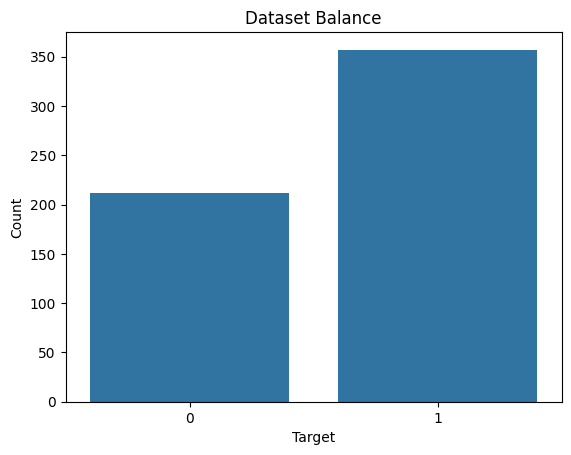

In [13]:
# Dataset balance
sns.countplot(x=data.target)
plt.ylabel('Count')
plt.xlabel('Target')
plt.title('Dataset Balance')
plt.show()

From the above plot, we can see the dataset is imbalanced If one class significantly outnumbers the other, accuracy can be misleading. For example, if 95% of the data is in one class, a model that always predicts the majority class could achieve 95% accuracy but still perform poorly for the minority class. In such cases, F1-score provides a better picture by balancing precision and recall.

####  If a model always predicts the majority class, it can achieve high accuracy without actually performing well on the minority class.
$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
$$

#### F1-score: By balancing precision and recall, F1-score provides a more robust evaluation metric for imbalanced datasets. It ensures that the model is not biased towards the majority class and can effectively identify instances from the minority class.
$$
\text{F1-Score} = \text{2}\times\frac{Precision \times Recall} {Precision + Recall }
$$

So F1-score is a good metric for evaluating models

#### Find the best model (Which algorithm performed the best and which one performed the worst?)

In [14]:
# Find the best performed algorithm
temp_f1score = 0.00
best_model = ''
for model in models.keys():
    if report[model]['weighted avg']['f1-score'] > temp_f1score:
        temp_f1score = report[model]['weighted avg']['f1-score']
        best_model = model
dict_report_best = report[best_model].copy()
best_accuracy = dict_report_best.pop('accuracy')
bdf = (pd.DataFrame(dict_report_best).T).round(decimals = 2)
print(f'The best performed algorithm is "{best_model}"\n')
print(bdf)
print(f'\naccuracy           {best_accuracy:.2f}')

The best performed algorithm is "Support Vector Machine"

              precision  recall  f1-score  support
0                  1.00    0.95      0.98     43.0
1                  0.97    1.00      0.99     71.0
macro avg          0.99    0.98      0.98    114.0
weighted avg       0.98    0.98      0.98    114.0

accuracy           0.98


In [15]:
# Find the worst performed algorithm
temp_f1score = 1.00
worst_model = ''
for model in models.keys():
    if report[model]['weighted avg']['f1-score'] < temp_f1score:
        temp_f1score = report[model]['weighted avg']['f1-score']
        worst_model = model
dict_report_worst = report[worst_model].copy()
worst_accuracy = dict_report_worst.pop('accuracy')
wdf = (pd.DataFrame(dict_report_worst).T).round(decimals = 2)
print(f'The worst performed algorithm is "{worst_model}"\n')
print(wdf)
print(f'\naccuracy           {worst_accuracy:.2f}')

The worst performed algorithm is "Decision Tree Classifier"

              precision  recall  f1-score  support
0                  0.93    0.93      0.93     43.0
1                  0.96    0.96      0.96     71.0
macro avg          0.94    0.94      0.94    114.0
weighted avg       0.95    0.95      0.95    114.0

accuracy           0.95
